# Uncovering Insights

## Overview
This notebook aims to analyse driver performance metrics and their impact on customer satisfaction. By calculating combined scores based on operational metrics, recognition, customer satisfaction, and experience, we can better understand what factors contribute most significantly to overall customer satisfaction. Additionally, we will explore whether vehicle type has an influence on client satisfaction.

## Goals
1. **Calculate Combined Scores**: Aggregate various performance metrics into a single combined score for each driver.
2. **Correlation Analysis**: Examine the relationships between different performance metrics and customer satisfaction.
3.a. **Influence of Vehicle Type on Client Satisfaction**: Determine if the brand of the vehicle impacts customer satisfaction.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def calculate_combined_score(df):
    """
    Calculates the combined score for drivers based on multiple metrics, including operational metrics,
    recognition, customer satisfaction, and driver experience.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing driver data.

    Returns:
    pd.DataFrame: The DataFrame with additional calculated columns.
    """

    # Calculate operational score based on weighted components
    df['operational_score'] = (
        df['driver_endurance_score'] * 0.2 +
        df['driver_profitabilty_score'] * 0.4 +
        df['driver_safety_adherence_score'] * 0.5 +
        df['driving_efficiency_score'] * 0.3
    )

    # Calculate recognition score based on special achievements
    df['recognition_score'] = df['special_achievements_awarded'].apply(lambda x: 100 if x else 0)

    # Calculate customer satisfaction score based on star ratings
    total_ratings = (
        df['number_of_1_star_ratings'] +
        df['number_of_2_star_ratings'] +
        df['number_of_3_star_ratings'] +
        df['number_of_4_star_ratings'] +
        df['number_of_5_star_ratings']
    )

    df['customer_satisfaction_score'] = (
        (df['number_of_1_star_ratings'] * 0.2 +
         df['number_of_2_star_ratings'] * 0.4 +
         df['number_of_3_star_ratings'] * 0.6 +
         df['number_of_4_star_ratings'] * 0.8 +
         df['number_of_5_star_ratings'] * 1.0)
        / total_ratings * 100
    ).clip(lower=0, upper=100)

    # Calculate experience score as a percentage
    df['experience_score'] = df['driver_experience_group'] * 10

    # Calculate the combined score as an average of other scores
    df['combined_score'] = (
        df['operational_score'] +
        df['recognition_score'] +
        df['customer_satisfaction_score'] +
        df['experience_score']
    ) / 4

    return df

In [3]:
# Load the dataset
df = pd.read_pickle('data2.pkl')

In [4]:
# Apply the function to calculate the combined score
df = calculate_combined_score(df)

In [5]:
# Convert vehicle_brand to a categorical type
df['vehicle_brand'] = df['vehicle_brand'].astype('category')

In [6]:
# Drop unnecessary columns
columns_to_drop = ['taxi_group_name', 'disabled', 'deleted', 'is_outlier', 'full_name', 'driver_id']
df = df.drop(columns=columns_to_drop)

In [7]:
# Compute pairwise correlation of columns
correlation_matrix = df.corr()

## Plot Heatmap

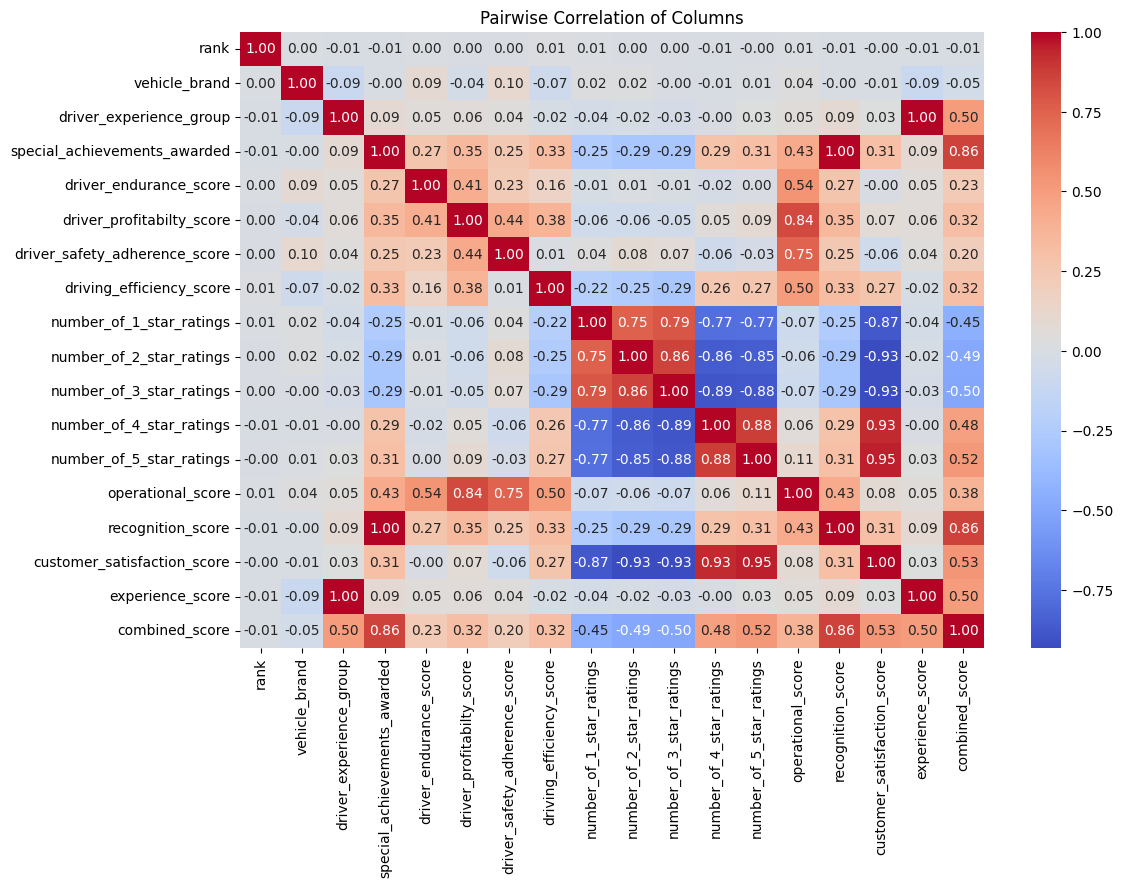

In [8]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation of Columns')
plt.show()

In [10]:
# Extract and sort correlations with customer satisfaction score
correlation_with_customer_satisfaction = correlation_matrix['customer_satisfaction_score'].sort_values(ascending=False)

In [11]:
# Print correlation coefficients
print(correlation_with_customer_satisfaction)

customer_satisfaction_score      1.000000
number_of_5_star_ratings         0.954398
number_of_4_star_ratings         0.929651
combined_score                   0.532420
special_achievements_awarded     0.310959
recognition_score                0.310959
driving_efficiency_score         0.270699
operational_score                0.084085
driver_profitabilty_score        0.073591
driver_experience_group          0.028382
experience_score                 0.028382
driver_endurance_score          -0.001324
rank                            -0.004894
vehicle_brand                   -0.008654
driver_safety_adherence_score   -0.057622
number_of_1_star_ratings        -0.874330
number_of_2_star_ratings        -0.926326
number_of_3_star_ratings        -0.931487
Name: customer_satisfaction_score, dtype: float64


In [12]:
# Check correlation between vehicle_brand and customer_satisfaction_score
correlation = df['vehicle_brand'].cat.codes.corr(df['customer_satisfaction_score'])

In [13]:
# Print the correlation coefficient
print("Correlation between vehicle_brand and customer_satisfaction_score:", correlation)

Correlation between vehicle_brand and customer_satisfaction_score: -0.008654422192554004


### Vehicle Brand and Customer Satisfaction Correlation

- The correlation between `vehicle_brand` and `customer_satisfaction_score` is -0.009, indicating a very weak negative correlation.
- This suggests that there is almost no linear relationship between the brand of the vehicle and customer satisfaction score.

## Special Analysis

### Customer Satisfaction

- **Strong Positive Correlations**:
  - `number_of_5_star_ratings` (0.954) and `number_of_4_star_ratings` (0.930): Higher numbers of 4-star and 5-star ratings are associated with higher customer satisfaction scores.

- **Moderate Positive Correlations**:
  - `combined_score` (0.532), `special_achievements_awarded` (0.311), and `recognition_score` (0.311): Factors such as overall performance score, special achievements, and recognition also contribute positively to customer satisfaction.

- **Weak Positive Correlations**:
  - `driving_efficiency_score` (0.271), `operational_score` (0.084), and `driver_profitabilty_score` (0.074): Metrics indicating a driver is efficient, quick, and working hard start to reflect in higher levels of satisfaction.

- **Weak Negative Correlations**:
  - `driver_safety_adherence_score` (-0.058): When a driver prioritizes safety, they might operate more cautiously, potentially resulting in a slower and less determined driving style. This cautious approach could affect customer satisfaction.

- **Strong Negative Correlations**:
  - `number_of_1_star_ratings` (-0.874), `number_of_2_star_ratings` (-0.926), and `number_of_3_star_ratings` (-0.931): Higher numbers of 1-star, 2-star, and 3-star ratings are associated with lower customer satisfaction scores.

## Conclusion
The correlations discovered provide insights into driver metrics and their behaviors. Based on the data, it appears that the brand of the vehicle, which is not a behavioral attribute, has no significant bearing on customer satisfaction, as determined by this analysis. This suggests that factors directly related to driver performance and behavior, such as ratings and performance scores, play a more significant role in shaping customer satisfaction levels.